In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import QuantileTransformer

In [2]:
df = pd.read_csv('./data/titanic_clean.csv')

In [3]:
label_sex = LabelEncoder()
label_embarked = LabelEncoder()

# Fit and transform on training data
df['Sex'] = label_sex.fit_transform(df['Sex'])
df['Embarked'] = label_embarked.fit_transform(df['Embarked'])

In [4]:
df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
129,0,3,1,45.0,0,0,6.9750,NaN,2
612,1,3,0,28.0,1,0,15.5000,NaN,1
219,0,2,1,30.0,0,0,10.5000,NaN,2
36,1,3,1,28.0,0,0,7.2292,NaN,0
890,0,3,1,32.0,0,0,7.7500,NaN,1


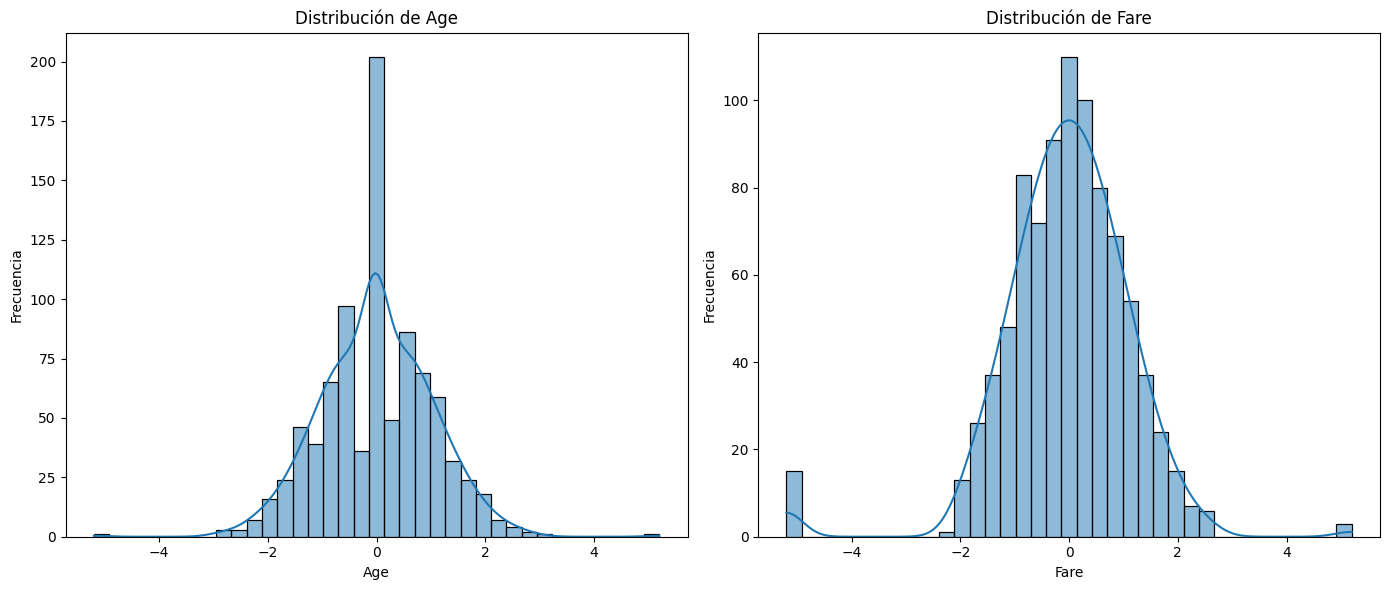

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(df['Age'].dropna(), kde=True, ax=axes[0])
axes[0].set_title('Distribución de Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frecuencia')

# Gráfica de la distribución de Fare
sns.histplot(df['Fare'].dropna(), kde=True, ax=axes[1])
axes[1].set_title('Distribución de Fare')
axes[1].set_xlabel('Fare')
axes[1].set_ylabel('Frecuencia')

# Mostrar las gráficas
plt.tight_layout()
plt.show()

In [6]:
qun_tra_age = QuantileTransformer(output_distribution = 'normal', n_quantiles=500)
qun_tra_fare = QuantileTransformer(output_distribution = 'normal', n_quantiles=500)

df['Age'] = qun_tra_age.fit_transform(df[['Age']])
df['Fare'] = qun_tra_fare.fit_transform(df[['Fare']])

In [8]:
mms_pclass= MinMaxScaler()
mms_sex = MinMaxScaler()
mms_age = MinMaxScaler()
mms_sibsp = MinMaxScaler()
mms_parch = MinMaxScaler()
mms_fare = MinMaxScaler()
mms_embarked = MinMaxScaler()

# Ejecutar transformaciones
df['Pclass'] = mms_pclass.fit_transform(df[['Pclass']])
df['Sex'] = mms_sex.fit_transform(df[['Sex']])
df['Age'] = mms_age.fit_transform(df[['Age']])
df['SibSp'] = mms_sibsp.fit_transform(df[['SibSp']])
df['Parch'] = mms_parch.fit_transform(df[['Parch']])
df['Fare'] = mms_fare.fit_transform(df[['Fare']])
df['Embarked'] = mms_embarked.fit_transform(df[['Embarked']])

In [10]:
df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
153,0,1.0,1.0,0.593162,0.000,0.333333,0.502174,NaN,1.0
571,1,0.0,0.0,0.652641,0.250,0.000000,0.589115,C101,1.0
144,0,0.5,1.0,0.396662,0.000,0.000000,0.479558,NaN,1.0
701,1,0.0,1.0,0.563806,0.000,0.000000,0.544804,E24,1.0
442,0,1.0,1.0,0.456270,0.125,0.000000,0.406451,NaN,1.0


In [11]:
df.to_csv('./data/titanic_procesado.csv', index=False)